# NEXN

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import pandas as pd
import warnings
warnings.simplefilter("ignore")

In [2]:
NEXN_Path = pd.read_csv("NEXN.txt", sep='\t').dropna(subset=['Protein change'])
NEXN_Path

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_144573.4(NEXN):c.201G>A (p.Trp67Ter),NEXN,W67*,Cardiomyopathy|Hypertrophic cardiomyopathy 20|...,Pathogenic/Likely pathogenic(Last reviewed: Ap...,"criteria provided, multiple submitters, no con...",VCV001409607,1,78383424,1,77917739,1409607,1340676,NaN,NC_000001.11:77917738:G:A,NaN
1,NM_144573.4(NEXN):c.354_357del (p.Lys119fs),NEXN,"K119fs, K55fs",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Pathogenic(Last reviewed: Oct 17, 2022)","criteria provided, single submitter",VCV002023692,1,78383862 - 78383865,1,77918177 - 77918180,2023692,2084173,NaN,NC_000001.11:77918176:AAGGAAG:AAG,NaN
2,NM_144573.4(NEXN):c.391C>G (p.Gln131Glu),NEXN,"Q131E, Q67E",Hypertrophic cardiomyopathy 20,"Pathogenic(Last reviewed: Nov 12, 2010)",no assertion criteria provided,VCV000030993,1,78383902,1,77918217,30993,39950,rs387907079,NC_000001.11:77918216:C:G,NaN
3,NM_144573.4(NEXN):c.676del (p.Ser226fs),NEXN,"S162fs, S226fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Mar 28, 2022)","criteria provided, single submitter",VCV002118680,1,78392283,1,77926598,2118680,2172689,NaN,NC_000001.11:77926597:TTT:TT,NaN
4,NM_144573.4(NEXN):c.717dup (p.Glu240fs),NEXN,"E240fs, E176fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Apr 16, 2022)","criteria provided, single submitter",VCV002103973,1,78392423 - 78392424,1,77926738 - 77926739,2103973,2165730,NaN,NC_000001.11:77926738:AAAAAAA:AAAAAAAA,NaN
5,NM_144573.4(NEXN):c.799G>T (p.Glu267Ter),NEXN,"E267*, E203*",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Sep 3, 2022)","criteria provided, single submitter",VCV000599095,1,78392512,1,77926827,599095,590237,rs771262904,NC_000001.11:77926826:G:T,NaN
6,NM_144573.4(NEXN):c.1084A>T (p.Lys362Ter),NEXN,"K298*, K362*",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Pathogenic(Last reviewed: May 3, 2022)","criteria provided, single submitter",VCV002132590,1,78398997,1,77933312,2132590,2186591,NaN,NC_000001.11:77933311:A:T,NaN
7,NM_144573.4(NEXN):c.1170del (p.Lys390fs),NEXN,"K390fs, K326fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: May 12, 2022)","criteria provided, single submitter",VCV001993576,1,78399079,1,77933394,1993576,2049363,NaN,NC_000001.11:77933393:AAAAA:AAAA,NaN
9,NM_144573.4(NEXN):c.1302del (p.Ile435fs),NEXN,"I371fs, I435fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Sep 19, 2022)","criteria provided, single submitter",VCV001018253,1,78401558,1,77935873,1018253,1003006,rs747902604,NC_000001.11:77935872:G:,NaN
10,NM_144573.4(NEXN):c.1348dup (p.Ser450fs),NEXN,"S386fs, S450fs",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Pathogenic(Last reviewed: Oct 3, 2022)","criteria provided, single submitter",VCV000538107,1,78401599 - 78401600,1,77935914 - 77935915,538107,516088,rs1553240600,NC_000001.11:77935914:AAAAA:AAAAAA,NaN


In [3]:
NEXN_LP = pd.read_csv("NEXN_LP.txt", sep='\t')
newNEXN_LP = NEXN_LP['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
NEXN_LP1 = NEXN_LP[newNEXN_LP].dropna(subset=['Protein change'])
NEXN_LP1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_144573.4(NEXN):c.201G>A (p.Trp67Ter),NEXN,W67*,Cardiomyopathy|Hypertrophic cardiomyopathy 20|...,Pathogenic/Likely pathogenic(Last reviewed: Ap...,"criteria provided, multiple submitters, no con...",VCV001409607,1,78383424,1,77917739,1409607,1340676,NaN,NC_000001.11:77917738:G:A,NaN


In [5]:
combined2 = [NEXN_LP1, NEXN_Path]
NEXN_combined = pd.concat(combined2)
NEXN_combined

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
0,NM_144573.4(NEXN):c.201G>A (p.Trp67Ter),NEXN,W67*,Cardiomyopathy|Hypertrophic cardiomyopathy 20|...,Pathogenic/Likely pathogenic(Last reviewed: Ap...,"criteria provided, multiple submitters, no con...",VCV001409607,1,78383424,1,77917739,1409607,1340676,NaN,NC_000001.11:77917738:G:A,NaN
0,NM_144573.4(NEXN):c.201G>A (p.Trp67Ter),NEXN,W67*,Cardiomyopathy|Hypertrophic cardiomyopathy 20|...,Pathogenic/Likely pathogenic(Last reviewed: Ap...,"criteria provided, multiple submitters, no con...",VCV001409607,1,78383424,1,77917739,1409607,1340676,NaN,NC_000001.11:77917738:G:A,NaN
1,NM_144573.4(NEXN):c.354_357del (p.Lys119fs),NEXN,"K119fs, K55fs",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Pathogenic(Last reviewed: Oct 17, 2022)","criteria provided, single submitter",VCV002023692,1,78383862 - 78383865,1,77918177 - 77918180,2023692,2084173,NaN,NC_000001.11:77918176:AAGGAAG:AAG,NaN
2,NM_144573.4(NEXN):c.391C>G (p.Gln131Glu),NEXN,"Q131E, Q67E",Hypertrophic cardiomyopathy 20,"Pathogenic(Last reviewed: Nov 12, 2010)",no assertion criteria provided,VCV000030993,1,78383902,1,77918217,30993,39950,rs387907079,NC_000001.11:77918216:C:G,NaN
3,NM_144573.4(NEXN):c.676del (p.Ser226fs),NEXN,"S162fs, S226fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Mar 28, 2022)","criteria provided, single submitter",VCV002118680,1,78392283,1,77926598,2118680,2172689,NaN,NC_000001.11:77926597:TTT:TT,NaN
4,NM_144573.4(NEXN):c.717dup (p.Glu240fs),NEXN,"E240fs, E176fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Apr 16, 2022)","criteria provided, single submitter",VCV002103973,1,78392423 - 78392424,1,77926738 - 77926739,2103973,2165730,NaN,NC_000001.11:77926738:AAAAAAA:AAAAAAAA,NaN
5,NM_144573.4(NEXN):c.799G>T (p.Glu267Ter),NEXN,"E267*, E203*",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Sep 3, 2022)","criteria provided, single submitter",VCV000599095,1,78392512,1,77926827,599095,590237,rs771262904,NC_000001.11:77926826:G:T,NaN
6,NM_144573.4(NEXN):c.1084A>T (p.Lys362Ter),NEXN,"K298*, K362*",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Pathogenic(Last reviewed: May 3, 2022)","criteria provided, single submitter",VCV002132590,1,78398997,1,77933312,2132590,2186591,NaN,NC_000001.11:77933311:A:T,NaN
7,NM_144573.4(NEXN):c.1170del (p.Lys390fs),NEXN,"K390fs, K326fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: May 12, 2022)","criteria provided, single submitter",VCV001993576,1,78399079,1,77933394,1993576,2049363,NaN,NC_000001.11:77933393:AAAAA:AAAA,NaN
9,NM_144573.4(NEXN):c.1302del (p.Ile435fs),NEXN,"I371fs, I435fs",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Pathogenic(Last reviewed: Sep 19, 2022)","criteria provided, single submitter",VCV001018253,1,78401558,1,77935873,1018253,1003006,rs747902604,NC_000001.11:77935872:G:,NaN


In [6]:
combo = NEXN_combined[['Name']]
np.array(np.array(combo['Name'].str.split(' ')).item(0)).item(0)
lst = []
for i in np.arange(len(NEXN_combined)):
    lst = np.append(lst, np.array(np.array(combo['Name'].str.split(' ')).item(i)).item(0))
    
lst
combo = Table().with_columns('Name', lst)
combo.show()

Name
NM_144573.4(NEXN):c.201G>A
NM_144573.4(NEXN):c.201G>A
NM_144573.4(NEXN):c.354_357del
NM_144573.4(NEXN):c.391C>G
NM_144573.4(NEXN):c.676del
NM_144573.4(NEXN):c.717dup
NM_144573.4(NEXN):c.799G>T
NM_144573.4(NEXN):c.1084A>T
NM_144573.4(NEXN):c.1170del
NM_144573.4(NEXN):c.1302del


In [7]:
import numpy as np
NEXN_ensembl_np = Table().read_table('NEXN_ensembl.txt', sep='\t').where('BIOTYPE', 'protein_coding')
new = NEXN_ensembl_np.select('#Uploaded_variation', 'Consequence')
new

#Uploaded_variation,Consequence
NM_144573.4(NEXN):c.201G>A,intron_variant
NM_144573.4(NEXN):c.201G>A,stop_gained
NM_144573.4(NEXN):c.201G>A,upstream_gene_variant
NM_144573.4(NEXN):c.201G>A,intron_variant
NM_144573.4(NEXN):c.201G>A,stop_gained
NM_144573.4(NEXN):c.201G>A,intron_variant
NM_144573.4(NEXN):c.201G>A,stop_gained
NM_144573.4(NEXN):c.201G>A,upstream_gene_variant
NM_144573.4(NEXN):c.201G>A,intron_variant
NM_144573.4(NEXN):c.201G>A,stop_gained


In [8]:
def label_consequence(consequence):
    if 'stop_gained' in consequence:
        return 'stop_gained'
    elif 'missense_variant' in consequence:
        return 'missense_variant'
    elif 'frameshift_variant' in consequence:
        return 'frameshift_variant'
    elif 'inframe_deletion' in consequence:
        return 'inframe_deletion'

In [9]:
try1 = new.apply(label_consequence, 'Consequence')
new2 = new.with_column('Our Consequences', try1)
new2
yay = new2.where('Our Consequences', are.not_equal_to(None))
test3 = yay.group('Our Consequences')
test3

Our Consequences,count
frameshift_variant,26
missense_variant,5
stop_gained,17


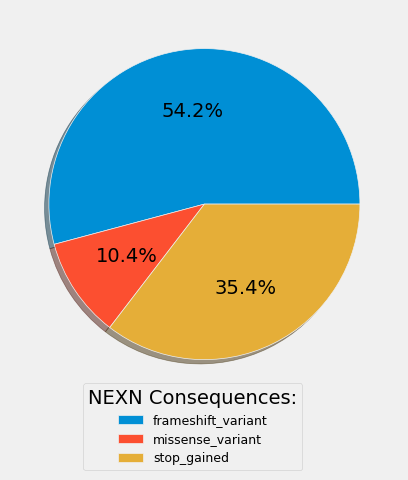

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.pie(test3.column('count'), autopct='%1.1f%%', shadow = True)
#,labels = test3.column('Our Consequences'), autopct='%1.1f%%', shadow = True)
plt.legend(title = 'NEXN Consequences:', fontsize="9", labels = test3.column('Our Consequences'), loc ="lower center", bbox_to_anchor=(0.37, -0.2, 0.2, 0.2))

In [11]:
NEXN_VUS = pd.read_csv("NEXN_VUS.txt", sep='\t')
newNEXN_VUS = NEXN_VUS['Condition(s)'].str.contains("Hypertrophic cardiomyopathy")
NEXN_VUS1 = NEXN_VUS[newNEXN_VUS].dropna(subset=['Protein change'])
NEXN_VUS1

,Name,Gene(s),Protein change,Condition(s),Clinical significance (Last reviewed),Review status,Accession,GRCh37Chromosome,GRCh37Location,GRCh38Chromosome,GRCh38Location,VariationID,AlleleID(s),dbSNP ID,Canonical SPDI,Unnamed: 15
5,NM_144573.4(NEXN):c.1A>C (p.Met1Leu),NEXN,M1L,Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Uncertain significance(Last reviewed: Jul 1, 2...","criteria provided, multiple submitters, no con...",VCV000519128,1.0,78381792,1.0,77916107,519128,509225,rs749167943,NC_000001.11:77916106:A:C,NaN
6,NM_144573.4(NEXN):c.7_9del (p.Asp3del),NEXN,D3del,Cardiovascular phenotype|Hypertrophic cardiomy...,"Uncertain significance(Last reviewed: Nov 8, 2...","criteria provided, multiple submitters, no con...",VCV000518850,1.0,78381796 - 78381798,1.0,77916111 - 77916113,518850,509226,rs760463744,NC_000001.11:77916110:ATGAT:AT,NaN
11,NM_144573.4(NEXN):c.47A>C (p.Lys16Thr),NEXN,K16T,Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Uncertain significance(Last reviewed: Aug 22, ...","criteria provided, single submitter",VCV001912904,1.0,78383270,1.0,77917585,1912904,1977005,NaN,NC_000001.11:77917584:A:C,NaN
13,NM_144573.4(NEXN):c.55C>T (p.Pro19Ser),NEXN,P19S,Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Uncertain significance(Last reviewed: Sep 1, 2...","criteria provided, single submitter",VCV000835184,1.0,78383278,1.0,77917593,835184,824421,rs199981645,NC_000001.11:77917592:C:T,NaN
16,NM_144573.4(NEXN):c.64T>A (p.Tyr22Asn),NEXN,Y22N,Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Uncertain significance(Last reviewed: Aug 28, ...","criteria provided, multiple submitters, no con...",VCV000450164,1.0,78383287,1.0,77917602,450164,442887,rs1553236590,NC_000001.11:77917601:T:A,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NM_144573.4(NEXN):c.2012T>C (p.Ile671Thr),NEXN,"I671T, I607T",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Uncertain significance(Last reviewed: May 31, ...","criteria provided, multiple submitters, no con...",VCV000518918,1.0,78408498,1.0,77942813,518918,509243,rs747781785,NC_000001.11:77942812:T:C,NaN
362,NM_144573.4(NEXN):c.2014G>A (p.Glu672Lys),NEXN,"E608K, E672K",Hypertrophic cardiomyopathy 20|Dilated cardiom...,"Uncertain significance(Last reviewed: Sep 1, 2...","criteria provided, single submitter",VCV000841719,1.0,78408500,1.0,77942815,841719,824425,rs771695320,NC_000001.11:77942814:G:A,NaN
365,NM_144573.4(NEXN):c.2017A>G (p.Ser673Gly),NEXN,"S609G, S673G",Dilated cardiomyopathy 1CC|Hypertrophic cardio...,"Uncertain significance(Last reviewed: May 11, ...","criteria provided, single submitter",VCV001019679,1.0,78408503,1.0,77942818,1019679,1003012,rs1651500018,NC_000001.11:77942817:A:G,NaN
366,NM_144573.4(NEXN):c.2019T>A (p.Ser673Arg),NEXN,"S609R, S673R",Cardiovascular phenotype|Cardiomyopathy|Dilate...,"Uncertain significance(Last reviewed: Aug 14, ...","criteria provided, multiple submitters, no con...",VCV001329337,1.0,78408505,1.0,77942820,1329337,1320024,NaN,NC_000001.11:77942819:T:A,NaN
